### Visualize the LVD Dwarfs in the SGA-2025

In [38]:
import os
import numpy as np
import fitsio
from astropy.table import Table
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

%matplotlib inline

In [35]:
workdir = '/global/cfs/cdirs/desicollab/users/ioannis/SGA/2025'
regions = ['dr11-south', 'dr9-north']

In [39]:
@ticker.FuncFormatter
def major_formatter(x, pos):
    if (x >= 0.01) and (x < 0.1):
        return f'{x:.2f}'
    elif (x >= 0.1) and (x < 1):
        return f'{x:.1f}'
    else:
        return f'{x:.0f}'

In [60]:
for region in regions[:1]:
    photofile = os.path.join(workdir, 'parent', 'photo', f'parent-photo-{region}-lvd-v1.0.fits')
    print(photofile)
    photo = Table(fitsio.read(photofile))
    print(f'Read {len(photo)} galaxies from {photofile}')

/global/cfs/cdirs/desicollab/users/ioannis/SGA/2025/parent/photo/parent-photo-dr11-south-lvd-v1.0.fits
Read 446 galaxies from /global/cfs/cdirs/desicollab/users/ioannis/SGA/2025/parent/photo/parent-photo-dr11-south-lvd-v1.0.fits


In [61]:
#photo.info()

In [63]:
I = (photo[f'FLUX_INIT_G'] == 0.) * (photo[f'FLUX_INIT_R'] == 0.) * (photo[f'FLUX_INIT_Z'] == 0.)  * (photo[f'FLUX_INIT_I'] == 0.) 
I = photo['OBJNAME'] == 'KK 221'
photo[I]

SGANAME,OBJNAME,STARFDIST,STARMAG,RA,DEC,RA_PHOT,DEC_PHOT,IN_GAIA,NODATA,CENTERMASKED,MGE_FAIL,SEP,DIAM_INIT,BA_INIT,PA_INIT,DIAM_PHOT,BA_PHOT,PA_PHOT,FLUX_INIT_G,FLUX_INIT_R,FLUX_INIT_I,FLUX_INIT_Z,FLUX_INIT_ERR_G,FLUX_INIT_ERR_R,FLUX_INIT_ERR_I,FLUX_INIT_ERR_Z,GINI_INIT_G,GINI_INIT_R,GINI_INIT_I,GINI_INIT_Z,FRACMASK_INIT_G,FRACMASK_INIT_R,FRACMASK_INIT_I,FRACMASK_INIT_Z,FLUX_PHOT_G,FLUX_PHOT_R,FLUX_PHOT_I,FLUX_PHOT_Z,FLUX_PHOT_ERR_G,FLUX_PHOT_ERR_R,FLUX_PHOT_ERR_I,FLUX_PHOT_ERR_Z,GINI_PHOT_G,GINI_PHOT_R,GINI_PHOT_I,GINI_PHOT_Z,FRACMASK_PHOT_G,FRACMASK_PHOT_R,FRACMASK_PHOT_I,FRACMASK_PHOT_Z
str25,str30,float32,float32,float64,float64,float64,float64,bool,bool,bool,bool,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32,float32
SGA2025 J207.1933-46.9969,KK 221,0.66094035,6.8879704,207.1933333,-46.99694444,207.18787348779412,-46.99805767971532,False,False,False,False,13.991765,90.6,0.67,0.0,90.06914,0.7924729,160.77089,1158.3953,1479.2878,2062.8953,3183.675,0.7789102,5.2963133,17.33962,4.176832,0.9744065,0.9494638,0.9615984,0.9652312,0.0,0.000692957,0.000661459,0.0,4592.395,5854.2188,7766.5195,11087.497,1.6749305,59.241962,100.42895,14.907262,0.9273351,0.8726966,0.9007843,0.89627445,0.0,0.0011652065,0.0020905177,0.00017992161


G 446 438
R 446 436
I 446 398
Z 446 436


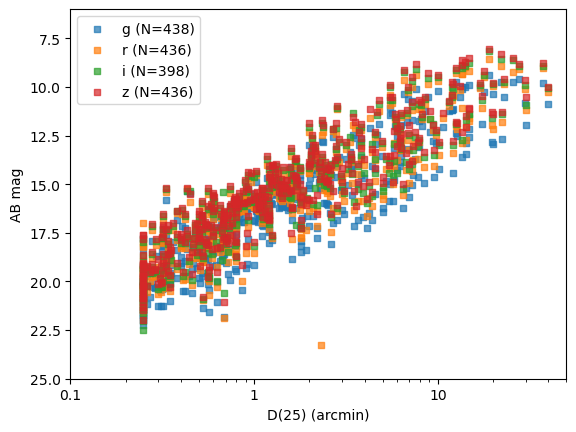

In [59]:
fig, ax = plt.subplots()
for band in ['G', 'R', 'I', 'Z']:
    I = photo[f'FLUX_INIT_{band}'] > 0.
    if np.sum(~I) > 0:
        #print(f'No {band.lower()}-band data for {",".join(photo["OBJNAME"][~I].value)}')
        pass

    print(band, len(photo), np.sum(I))
    diam = photo['DIAM_INIT'][I]/60.
    abmag = 22.5-2.5*np.log10(photo[f'FLUX_INIT_{band}'][I])
    ax.scatter(diam, abmag, s=20, label=f'{band.lower()} (N={np.sum(I)})',
               marker='s', alpha=0.7)
ax.legend(loc='upper left')
ax.set_xscale('log')
ax.xaxis.set_major_formatter(major_formatter)
ax.set_xlim(0.1, 50)
ax.set_ylim(25, 6)
ax.set_ylabel('AB mag')
ax.set_xlabel('D(25) (arcmin)');